In [8]:
MAP_NAME = 'track'
DIRECTION = False

In [9]:
import os
import shutil
import centerline
import numpy as np
import matplotlib.pyplot as plt

Make sure the mask is correct. If not, edit the file and run this script again.


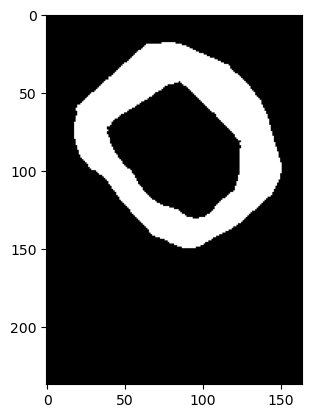

In [11]:
# If not exists, create the mask
if not os.path.exists(f'{MAP_NAME}_mask.pgm'):
  # Copy from {MAP_NAME}.pgm to {MAP_NAME}_mask.pgm
  shutil.copyfile(f'{MAP_NAME}.pgm', f'{MAP_NAME}_mask.pgm')
  print(f'Created {MAP_NAME}_mask.pgm. Please edit it to remove the mask.')
map_pgm = centerline.read_map_pgm(f'{MAP_NAME}_mask.pgm')
print("Make sure the mask is correct. If not, edit the file and run this script again.")
plt.imshow(map_pgm, cmap='gray')

Make sure the centerline is correct. If not, edit the file and run this script again.


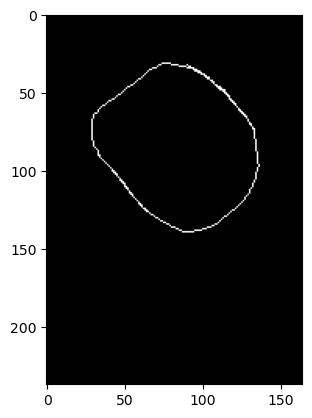

In [14]:
from skimage.morphology import skeletonize
from PIL import Image


# If not exists, create the
if not os.path.exists(f'{MAP_NAME}_centerline.pgm'):
  skeleton = skeletonize(map_pgm, method='lee')
  skeleton = Image.fromarray(np.flipud(skeleton))
  skeleton.save(f'{MAP_NAME}_centerline.pgm')
else:
  skeleton = centerline.read_map_pgm(f'{MAP_NAME}_centerline.pgm')
print("Make sure the centerline is correct. If not, edit the file and run this script again.")
plt.imshow(skeleton, cmap='gray')

In [15]:
from scipy.ndimage import distance_transform_edt

yaml_content = centerline.read_map_yaml(f'{MAP_NAME}.yaml')
dist_transform: np.ndarray = distance_transform_edt(map_pgm)

cl = centerline.gen_centerline_from_img(skeleton, dist_transform, DIRECTION)
cl_real = centerline.convert_centerline_to_real(cl, yaml_content)
centerline.write_centerline_csv(f"{MAP_NAME}_centerline.csv", cl_real)